In [1]:
from PIL import Image
from keras import backend as K

import random
import glob

import numpy as np
import tensorflow.gfile as gfile
import matplotlib.pyplot as plt

Using TensorFlow backend.
D:\Anoconda2\envs\Tensorflow2021\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anoconda2\envs\Tensorflow2021\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anoconda2\envs\Tensorflow2021\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anoconda2\envs\Tensorflow2021\lib\site-packages\tenso

In [12]:
NUMBER = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
LOWERCASE = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
            'v', 'w', 'x', 'y', 'z']
UPPERCASE = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U',
           'V', 'W', 'X', 'Y', 'Z']

CAPTCHA_CHARSET = NUMBER   # 验证码字符集
CAPTCHA_LEN = 4            # 验证码长度
CAPTCHA_HEIGHT = 60        # 验证码高度
CAPTCHA_WIDTH = 160        # 验证码宽度
TRAIN_DATA_DIR = './train_data/' # 验证码数据集目录

In [32]:
image = []
text = []
count = 0
for filename in glob.glob(TRAIN_DATA_DIR + '*.png'):
    image.append(np.array(Image.open(filename)))
    text.append(filename.lstrip(TRAIN_DATA_DIR+'\\').rstrip('.png'))
    count += 1
    if count >= 100:
        break

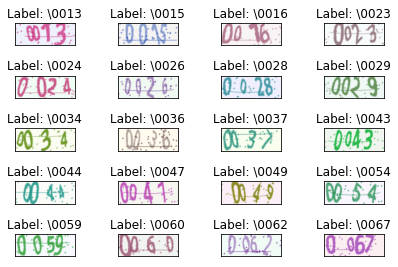

In [17]:
plt.figure()
for i in range(20):
    plt.subplot(5,4,i+1) # 绘制前20个验证码，以5行4列子图形式展示
    plt.tight_layout() # 自动适配子图尺寸
    plt.imshow(image[i])
    plt.title("Label: {}".format(text[i])) # 设置标签为子图标题
    plt.xticks([]) # 删除x轴标记
    plt.yticks([]) # 删除y轴标记
plt.show()

In [18]:
image=np.array(image,dtype=np.float32)

print(image.shape)

(100, 60, 160, 3)


In [19]:
def rgb2gray(img):
    # Y' = 0.299 R + 0.587 G + 0.114 B
    # https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale
    return np.dot(img[...,:3], [0.299, 0.587, 0.114])

image = rgb2gray(image)
print(image.shape)

(100, 60, 160)


In [20]:
image = image / 255



In [24]:
def fir_keras_channels(batch,rows=CAPTCHA_HEIGHT,cols=CAPTCHA_WIDTH):
    if K.image_data_format()=='channels_first':
        batch=batch.reshape(batch.shape[0],1,rows,cols)
        input_shape=(1,rows,cols)
    else:
        batch = batch.reshape(batch.shape[0], rows, cols, 1)
        input_shape = (rows, cols, 1)

    return batch, input_shape

image, input_shape = fir_keras_channels(image)

print(image.shape)
print(input_shape)



(100, 60, 160, 1)
(60, 160, 1)


In [25]:
def text2vec(text,length=CAPTCHA_LEN,charset=CAPTCHA_CHARSET):
    text_len=len(text)
    vec=np.zeros(length*len(charset))
    for i in range(length):
        vec[charset.index(text[i])+i*len(charset)]=1
    return vec

In [33]:
text=list(text)
vec=[None]*len(text)
for i in range(len(vec)):
    vec[i]=text2vec(text[i])


In [35]:
## 将验证码向量解码为对应字符
print(vec[0].shape ,type(vec))

(40,) <class 'list'>


In [38]:
def vec2text(vector):
    if not isinstance(vector,np.ndarray):
        vector=np.asarray(vector)
    vector=vector.reshape(CAPTCHA_LEN,-1)
    text=''
    print(vector.shape)
    for item in vector:
        text+=CAPTCHA_CHARSET[np.argmax(item)]
    return text

In [36]:
yy_vec = np.array([[2.0792404e-10, 4.3756086e-07, 3.1140310e-10, 9.9823320e-01,
                    5.1135743e-15, 3.7417038e-05, 1.0556480e-08, 9.0933657e-13,
                    2.7573466e-07, 1.7286760e-03, 1.1030550e-07, 1.1852034e-07,
                    7.9457263e-10, 3.4533365e-09, 6.6065012e-14, 2.8996323e-05,
                    7.6345885e-13, 3.1817032e-16, 3.9540555e-05, 9.9993122e-01,
                    5.3814397e-13, 1.2061575e-10, 1.6408040e-03, 9.9833637e-01,
                    6.5149628e-08, 5.2246549e-12, 1.1365444e-08, 9.5700288e-12,
                    2.2725430e-05, 5.2195204e-10, 3.2457771e-13, 2.1413280e-07,
                    7.3547295e-14, 4.4094882e-06, 3.8390007e-07, 9.9230206e-01,
                    6.4467136e-03, 3.9224533e-11, 1.2461344e-03, 1.1253484e-07]],
                  dtype=np.float32)
print(yy_vec.shape,type(yy_vec))

(1, 40) <class 'numpy.ndarray'>


In [39]:
yy=vec2text(yy_vec)



(4, 10)
